In [1]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
#!pip install ipympl
#%matplotlib inline
#%matplotlib widget

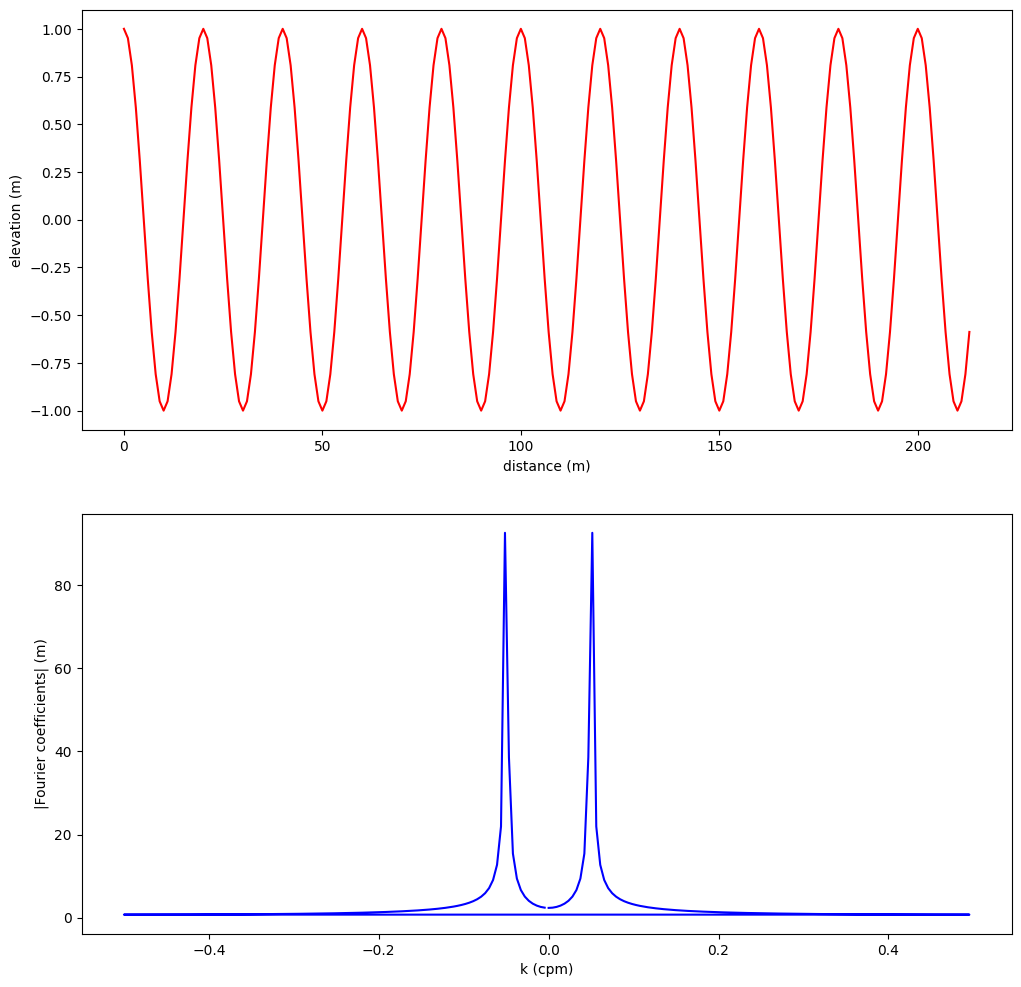

In [2]:
# sampling rate (cpm)
ks = 1
# sampling interval
dx = 1.0/ks

ko = 1/20. # input wavenumvber cpm


L=10.7/ko # record length (choose 10 or 100 wavelengths)
x = np.arange(0,L,dx)

yx = 1*np.cos(2*np.pi*ko*x) # compute spatial series with a wave amplitde of 1 and wavenumber ko (assume are units m)

#ko2 = 1.2
#y += np.sin(2*np.pi*ko2*x)

#  compute the difference of the wavenumbers
# Deltak=ko2-ko1
# kc=1/2*(ko2+ko1) # center (average) wavenumber
# Nw = kc/Deltak # number of waves in group

# compute the variance of the time series
yvar=np.var(yx)

# obtain Fourier coeffcients via FFT (fast Fourier transform)
yk = fft(yx)
Nfft = len(yx)
k = np.fft.fftfreq(Nfft)/(dx)


plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, yx, 'r')
plt.ylabel('elevation (m)')
plt.xlabel('distance (m)')

plt.subplot(212)
plt.plot(k, np.abs(yk), 'b')
plt.xlabel('k (cpm)')
plt.ylabel('|Fourier coefficients| (m)')
plt.show()

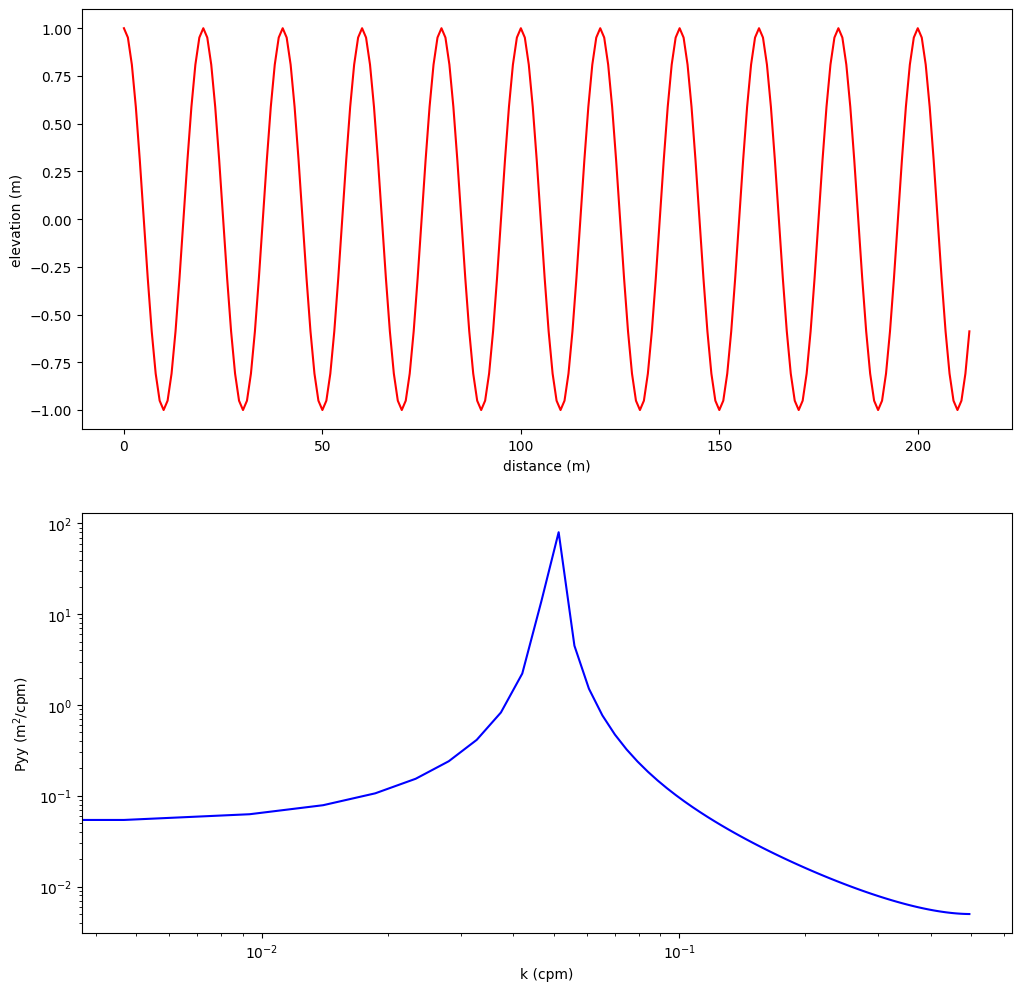

In [3]:
# compute spectral density (according to Parserval's theorem)
dk=1/L
# compute spectrum
PSD=np.abs(yk)**2/Nfft**2/dk # power spectral density ( m^2 / cpm )
# keep only positive frequencies
Npos=int(Nfft/2)
kp = k[0:Npos]
PSD=2*PSD[0:Npos] # times two to account for the variance of the ambigous negative frequencies

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, yx, 'r')
plt.ylabel('elevation (m)')
plt.xlabel('distance (m)')

plt.subplot(212)
plt.loglog(kp, PSD, 'b')
plt.xlabel('k (cpm)')
plt.ylabel('Pyy (m$^2$/cpm)')
plt.show()

In [4]:
# check the integral over all frequncies to match the variance
sum(PSD*dk)

np.float64(0.5043354139000759)

In [5]:
yvar

np.float64(0.5041063057390885)

In [6]:
#tapering example
# tapering is important to minimize artifacts at high frquencies due to
# finite record lengths

# Hann taper
taper=.5*(1 - np.cos(2*np.pi*(np.arange(0,Nfft)/(Nfft-1))))

In [7]:
# apply taper
yxt=yx*taper

Text(0.5, 0, 'time (s)')

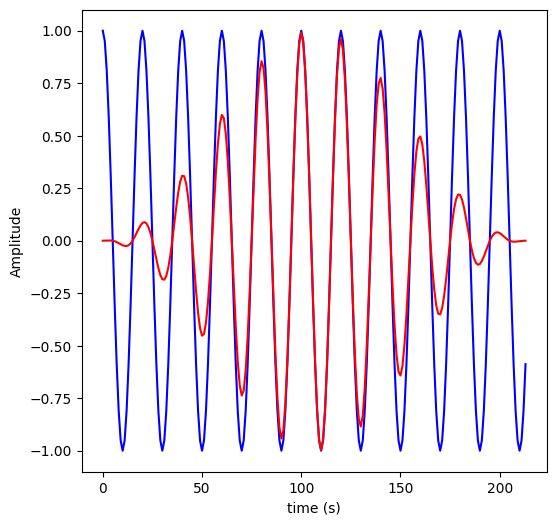

In [8]:
plt.figure(figsize = (6, 6))
plt.plot(x, yx, 'b')
plt.plot(x, yxt, 'r')
plt.ylabel('Amplitude')
plt.xlabel('time (s)')

In [9]:
# compute variace loss factor due to taper
Fac=np.var(yx)/np.var(yxt)

In [10]:
Fac

np.float64(2.701189008333855)

In [11]:
# When computing the spectrum from a tapered time series make sure to
# multiply the spectrum by the factor Fac to preserve the variance of the
#% original signal. The factor will depend on the exact type of taper used (Hann,Hamming, Tukey)

In [12]:
# write a function to compute the spectrum and compute it for the tapered data

In [13]:
def compute_1d_spectrum(eta,dx):
    etak = fft(eta)
    Nfft = len(eta)
    k = np.fft.fftfreq(Nfft)/(dx)
    # compute spectrum
    PSD=np.abs(etak)**2/Nfft**2/dk # power spectral density ( m^2 / cpm )
    # keep only positive frequencies
    Npos=int(Nfft/2)
    kp = k[0:Npos]
    PSD=2*PSD[0:Npos] # times two to account for the variance of the ambigous negative frequencies
    return PSD,k  # smoothed spectrum PSDs at center wavenumber ksc

In [14]:
[PSDt,k]=compute_1d_spectrum(yxt,dx)

In [15]:
# check the integral over all frequncies to match the variance
sum(PSDt*dk)

np.float64(0.18662386069863063)

In [16]:
# scale to match the orignial variance
PSDt=PSDt*np.var(yx)/sum(PSDt*dk)

In [17]:
# check the integral over all frequncies to match the variance
sum(PSDt*dk) # now it matches

np.float64(0.5041063057390882)

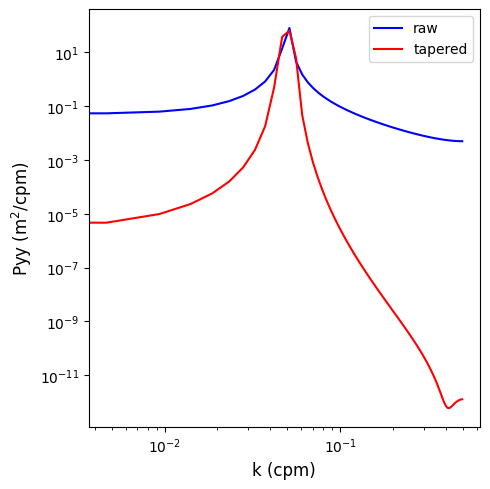

In [18]:
# compare the spectra
plt.figure(figsize = (5, 5))
plt.loglog(kp, PSD, 'b',label='raw')
plt.loglog(kp, PSDt, 'r',label='tapered')
plt.xlabel('k (cpm)',fontsize=12)
plt.ylabel('Pyy (m$^2$/cpm)',fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()